# Series de Tiempo

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [2]:
pip install --upgrade statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [9]:
import pandas as pd


def get_temperature_data(download=False):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',
                         header=0, index_col=0,parse_dates=True, squeeze=True)
        #data.to_csv('data/temperature_data.csv',index=False)
    else:
        data=pd.read_csv('data/temperature_data.csv', low_memory=False)
    return data

data=get_temperature_data(COLAB)

In [11]:
data.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

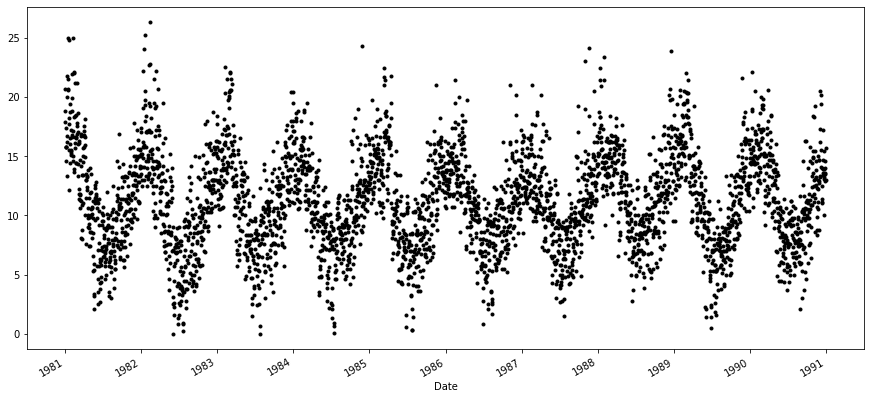

In [12]:
import matplotlib.pyplot as plt

data.plot(figsize=(15,7),style= 'k.')
plt.show()

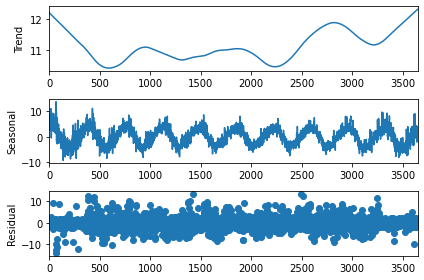

In [18]:
from statsmodels.tsa.seasonal import STL

series=data.values
stl = STL(series.squeeze(),period=12*30, robust=True)
res = stl.fit()
fig = res.plot(observed=False, resid=True)


In [20]:
from statsmodels.tsa.arima_model import ARIMA

X = series.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]

In [21]:
# modelo auto-regresivo de orden 1
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 14.687
Standard Error: 2.574
95% Prediction Interval: 9.643 to 19.732


In [22]:
# modelo media movil orden 1
model = ARIMA(train, order=(0,0,1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 13.424
Standard Error: 3.071
95% Prediction Interval: 7.406 to 19.443


In [23]:
# modelo auto-regresivo orden 1 media movil orden 1
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 14.472
Standard Error: 2.557
95% Prediction Interval: 9.461 to 19.483


In [24]:
# modelo auto-regresivo orden 1 integrado media movil orden 1 
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 14.781
Standard Error: 2.427
95% Prediction Interval: 10.024 to 19.538


para determinar el orden del modelo $AR(p)$, utilizamos la funcion de autocorrelacion parcial (PACF) la cual decae fuerte despues del orden $p$. 

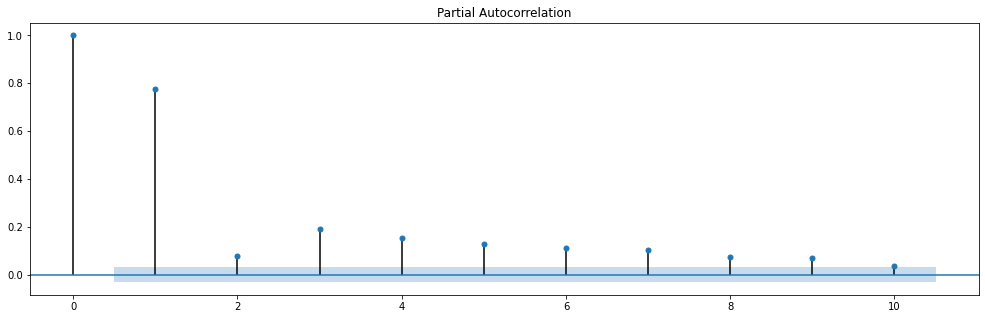

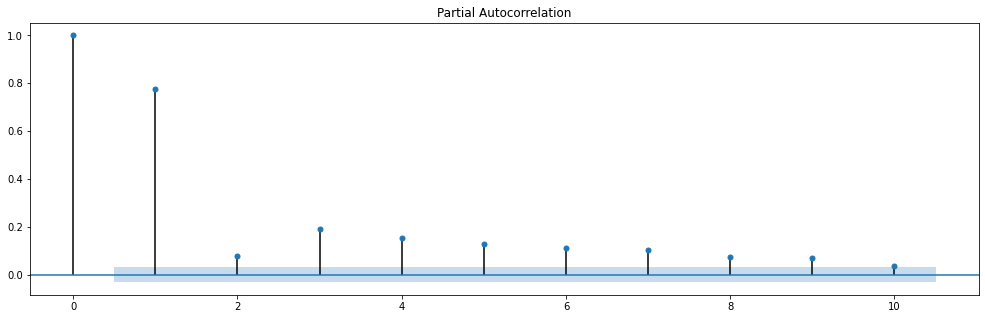

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(17,5))
plot_pacf(series, lags=10,alpha=.05,ax=ax)

Para determinar el orden del modelo $MA(q)$, utilizamos la funcion de autocorrelacion (ACF) la cual decae fuerte despues del orden $q$. 

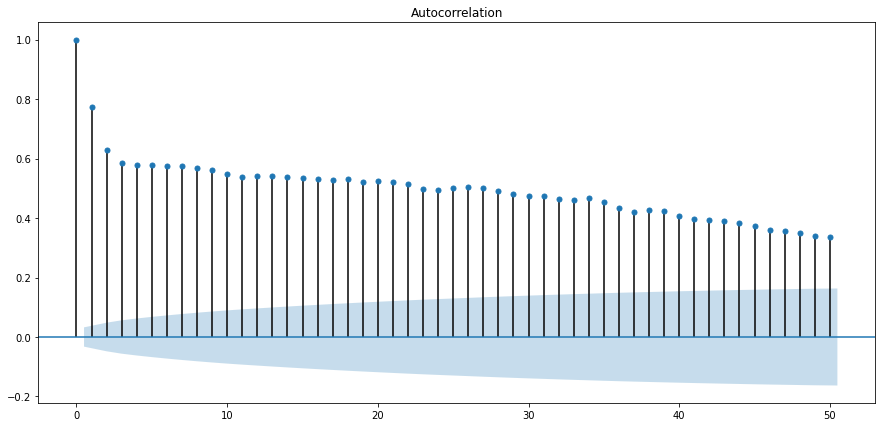

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(15,7))
plot_acf(series, lags=50,ax=ax,alpha=.05)
plt.show()

In [40]:
# modelo AR orden 2  
model = ARIMA(train,order=(2,0,0))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 14.596
Standard Error: 2.566
95% Prediction Interval: 9.567 to 19.626


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3649
Model:                     ARMA(2, 0)   Log Likelihood               -8616.924
Method:                       css-mle   S.D. of innovations              2.566
Date:                Sat, 15 Aug 2020   AIC                          17241.848
Time:                        15:18:15   BIC                          17266.657
Sample:                             0   HQIC                         17250.683
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1929      0.205     54.666      0.000      10.792      11.594
ar.L1.y        0.7157      0.017     43.347      0.000       0.683       0.748
ar.L2.y        0.0771      0.017      4.667      0.000       0.045       0.109
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2334           +0.0000j            1.2334            0.0000
AR.2          -10.5174           +0.0000j           10.5174            0.5000
-----------------------------------------------------------------------------
"""

In [44]:
# modelo AR orden 1  
model = ARIMA(train,order=(9,0,0))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 13.000
Forecast: 14.505
Standard Error: 2.427
95% Prediction Interval: 9.747 to 19.262


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3649
Model:                     ARMA(9, 0)   Log Likelihood               -8414.543
Method:                       css-mle   S.D. of innovations              2.427
Date:                Sat, 15 Aug 2020   AIC                          16851.086
Time:                        15:20:54   BIC                          16919.311
Sample:                             0   HQIC                         16875.383
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2648      0.474     23.742      0.000      10.335      12.195
ar.L1.y        0.6136      0.017     37.153      0.000       0.581       0.646
ar.L2.y       -0.0815      0.019     -4.202      0.000      -0.119      -0.043
ar.L3.y        0.0652      0.019      3.357      0.001       0.027       0.103
ar.L4.y        0.0531      0.019      2.735      0.006       0.015       0.091
ar.L5.y        0.0565      0.019      2.910      0.004       0.018       0.095
ar.L6.y        0.0444      0.019      2.286      0.022       0.006       0.082
ar.L7.y        0.0619      0.019      3.187      0.001       0.024       0.100
ar.L8.y        0.0304      0.019      1.566      0.117      -0.008       0.068
ar.L9.y        0.0724      0.017      4.383      0.000       0.040       0.105
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0287           -0.0000j            1.0287           -0.0000
AR.2            0.9504           -0.8359j            1.2657           -0.1148
AR.3            0.9504           +0.8359j            1.2657            0.1148
AR.4            0.3008           -1.3365j            1.3700           -0.2148
AR.5            0.3008           +1.3365j            1.3700            0.2148
AR.6           -1.3484           -0.5546j            1.4580           -0.4379
AR.7           -1.3484           +0.5546j            1.4580            0.4379
AR.8           -0.6266           -1.3064j            1.4489           -0.3212
AR.9           -0.6266           +1.3064j            1.4489            0.3212
-----------------------------------------------------------------------------
"""

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend= 'nc',disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print( 'ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f'%(best_cfg, best_score))

In [1]:
import warnings

p_values = range(0, 10)
d_values = range(0, 1)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

NameError: ignored

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1. Implementar un modelo ARIMA para predecir el total de 'casos por millon de habitantes'.
2. Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del orden del modelo.


In [3]:
import pandas as pd

def get_owid_data(download=False):
    if download:
        data=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
        #data.to_csv('data/covid_owid_data.csv')
    else:
        data=pd.read_csv('data/covid_owid_data.csv')
    return data

data=get_owid_data(True)

In [4]:
data['date']=pd.to_datetime(data['date'],format='%Y/%m/%d')
data['location'] = data['location'].astype('category')
data['continent'] = data['continent'].astype('category')
data['iso_code'] = data['iso_code'].astype('category')

In [13]:
grouped_df=data.groupby(['location','date'],observed=True,sort=['date']).mean()
removed_outliers = grouped_df['new_cases_per_million']['Chile'].between(0, grouped_df['new_cases_per_million']['Chile'].quantile(.95))
data_chile=grouped_df['new_cases_per_million']['Chile'][removed_outliers]

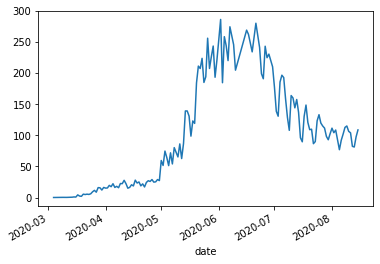

In [14]:
import matplotlib.pyplot as plt

data_chile.plot()
plt.show()

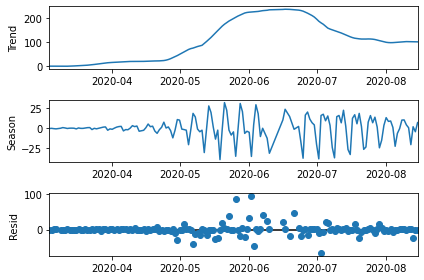

In [21]:
from statsmodels.tsa.seasonal import STL

series=data_chile.values
stl = STL(data_chile.squeeze(),period=7, robust=True)
res = stl.fit()
fig = res.plot(observed=False, resid=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


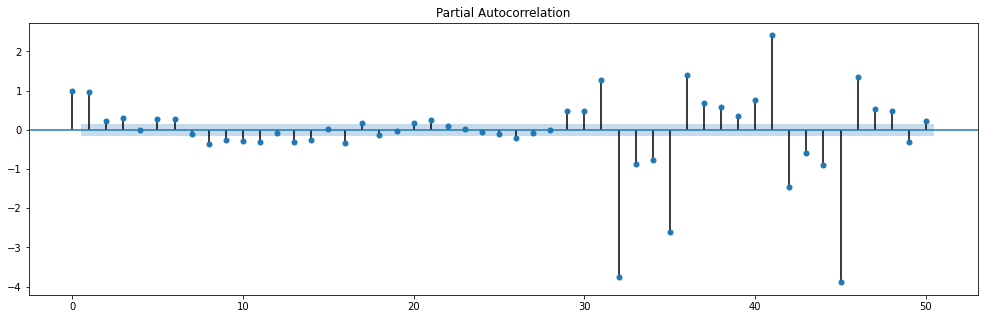

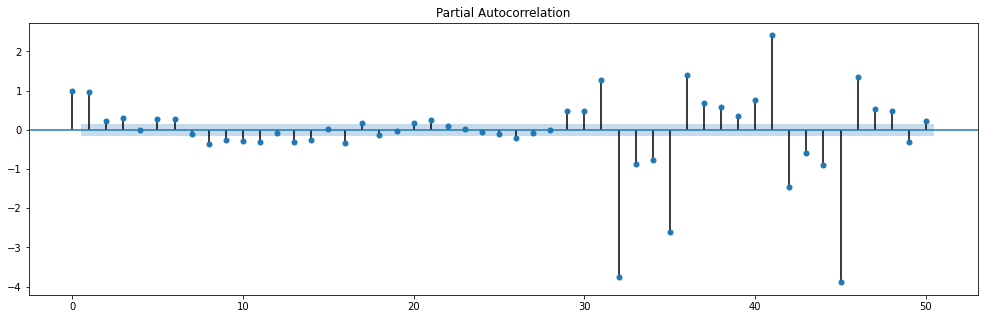

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(17,5))
plot_pacf(series, lags=50,alpha=.05,ax=ax)

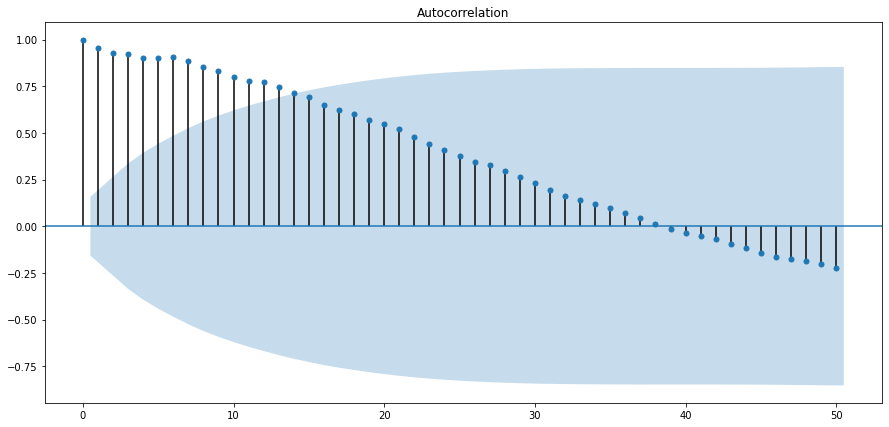

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(15,7))
plot_acf(series, lags=50,ax=ax,alpha=.05)
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

X = series.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]

In [27]:
# modelo AR orden 1  
model = ARIMA(train,order=(9,1,0))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 108.651
Forecast: 104.133
Standard Error: 18.667
95% Prediction Interval: 67.546 to 140.720


In [34]:
import warnings

p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=97.194
ARIMA(0, 1, 1) RMSE=29.117
ARIMA(0, 1, 2) RMSE=29.006
ARIMA(0, 2, 1) RMSE=30.800
ARIMA(0, 2, 2) RMSE=29.248
ARIMA(1, 0, 0) RMSE=30.399
ARIMA(1, 1, 0) RMSE=30.070
ARIMA(1, 1, 1) RMSE=28.895
ARIMA(1, 2, 0) RMSE=43.071
ARIMA(2, 0, 0) RMSE=30.031
ARIMA(2, 1, 0) RMSE=28.983
ARIMA(2, 1, 1) RMSE=29.356
ARIMA(2, 2, 0) RMSE=35.917
ARIMA(3, 0, 0) RMSE=28.985
ARIMA(3, 1, 0) RMSE=29.662
ARIMA(3, 1, 1) RMSE=30.145
ARIMA(3, 2, 0) RMSE=36.332
ARIMA(4, 0, 0) RMSE=29.611
ARIMA(4, 1, 0) RMSE=29.206
ARIMA(4, 1, 1) RMSE=29.262
ARIMA(4, 2, 0) RMSE=36.840
Best ARIMA(1, 1, 1) RMSE=28.895


In [35]:
# modelo AR orden 1  
model = ARIMA(train,order=(1,1,1))
model_fit = model.fit(disp=False)
forecast, stderr, conf = model_fit.forecast()
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Prediction Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))

Expected: 108.651
Forecast: 96.378
Standard Error: 22.060
95% Prediction Interval: 53.141 to 139.615


In [45]:
def predict_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend= 'nc',disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    return predictions,test

In [46]:
pred,test=predict_arima_model(series, (1,1,1))

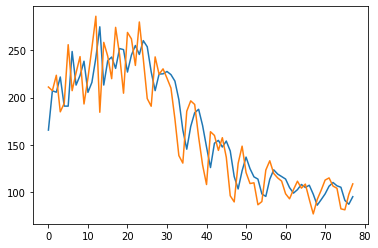

In [47]:
plt.plot(pred)
plt.plot(test)
plt.show()

In [74]:
pip install --upgrade hmmlearn

     |████████████████████████████████| 368kB 2.7MB/s 


In [102]:
import numpy as np
from hmmlearn import hmm

hmm_model = hmm.GaussianHMM(n_components=5, covariance_type="full", n_iter=100)
hmm_model.fit(series.reshape(-1, 1))
Z2 = hmm_model.predict(series.reshape(-1, 1))

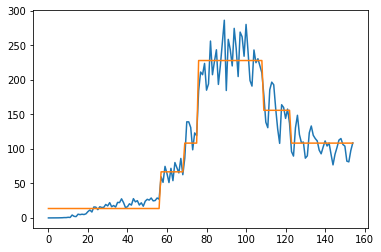

In [103]:
plt.plot(series)
plt.plot(hmm_model.means_[Z2])

In [113]:
hmm_model.transmat_

array([[9.23100806e-001, 6.60626343e-103, 1.20808652e-092,
        7.68946464e-002, 1.43765879e-019, 4.54706817e-006],
       [1.10644053e-152, 9.69628248e-001, 0.00000000e+000,
        1.31744802e-043, 3.03717517e-002, 6.50139253e-087],
       [1.75454855e-002, 0.00000000e+000, 9.82454514e-001,
        0.00000000e+000, 0.00000000e+000, 1.70701578e-316],
       [1.30469601e-046, 8.28139717e-002, 6.17954240e-253,
        5.94244690e-001, 1.37573139e-010, 3.22941338e-001],
       [3.38857815e-055, 4.11567266e-019, 0.00000000e+000,
        6.69912666e-002, 9.22746813e-001, 1.02619199e-002],
       [1.72403029e-030, 2.01471769e-023, 1.08656533e-202,
        1.19603402e-001, 1.01152011e-019, 8.80396598e-001]])

In [112]:
for n_comp in range(1,7):
  hmm_model = hmm.GaussianHMM(n_components=n_comp, covariance_type="full", n_iter=100)
  hmm_model.fit(series.reshape(-1, 1))
  print('Gaussian HMM, components : {0}, score : {1:0.2f}'.format(n_comp,-1.0*hmm_model.score(series.reshape(-1, 1))))

Gaussian HMM, components : 1, score : 905.79
Gaussian HMM, components : 2, score : 762.73
Gaussian HMM, components : 3, score : 699.17
Gaussian HMM, components : 4, score : 685.36
Gaussian HMM, components : 5, score : 664.99
Gaussian HMM, components : 6, score : 659.42
